In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPU Devices:", tf.config.list_physical_devices('GPU'))


TensorFlow Version: 2.12.0
Built with CUDA: False
GPU Devices: []


In [4]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("✅ Running on GPU:", gpus)
else:
    print("❌ No GPU detected. Running on CPU.")

❌ No GPU detected. Running on CPU.


In [6]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10
LEARNING_RATE = 0.0001

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True,
    fill_mode ="nearest"
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [9]:
train_dataset = train_datagen.flow_from_directory(
    './train',
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode = 'binary'
)

Found 2538 images belonging to 2 classes.


In [10]:
test_dataset = test_datagen.flow_from_directory(
    './validation',
    target_size = (224,224),
    batch_size = BATCH_SIZE,
    class_mode = 'binary'
)

Found 2538 images belonging to 2 classes.


In [11]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),


    Conv2D(128,(3,3),activation='relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [12]:
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)

Epoch 1/10
159/159 [==============================] - 251s 2s/step - loss: 1.5887 - accuracy: 0.6206 - val_loss: 4.0818 - val_accuracy: 0.5879
Epoch 2/10
159/159 [==============================] - 210s 1s/step - loss: 0.6634 - accuracy: 0.6529 - val_loss: 5.4656 - val_accuracy: 0.5879
Epoch 3/10
159/159 [==============================] - 213s 1s/step - loss: 0.6473 - accuracy: 0.6580 - val_loss: 0.9043 - val_accuracy: 0.6344
Epoch 4/10
159/159 [==============================] - 205s 1s/step - loss: 0.6183 - accuracy: 0.6734 - val_loss: 0.5403 - val_accuracy: 0.6982
Epoch 5/10
159/159 [==============================] - 207s 1s/step - loss: 0.5903 - accuracy: 0.6769 - val_loss: 0.5008 - val_accuracy: 0.7364
Epoch 6/10
159/159 [==============================] - 204s 1s/step - loss: 0.5758 - accuracy: 0.6911 - val_loss: 0.5296 - val_accuracy: 0.7049
Epoch 7/10
159/159 [==============================] - 202s 1s/step - loss: 0.5744 - accuracy: 0.6946 - val_loss: 0.4919 - val_accuracy: 0.7801

In [14]:
model.save("cnn_covid_model.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [15]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"🎯 Test Accuracy: {test_acc * 100:.2f}%")

159/159 [==============================] - 51s 321ms/step - loss: 0.4470 - accuracy: 0.7640
🎯 Test Accuracy: 76.40%


In [16]:
def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0  # Rescale
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_label = "Positive" if prediction[0][0] > 0.5 else "Negative"

    plt.imshow(img)
    plt.title(f"Predicted Class: {class_label}")
    plt.axis("off")
    plt.show()

1/1 [==============================] - 0s 255ms/step


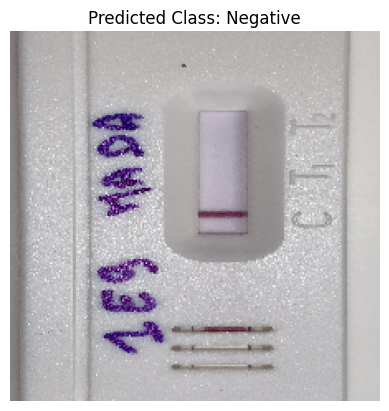

In [17]:
predict_image("./validation/NEGATIVE/JPEG image-08B1EEC706E7-12.jpeg")

In [18]:
# from tensorflow.keras.models import load_model

# model = load_model("cnn_covid_model.h5", compile=False)
# model.save("cnn_covid_model_tf12.h5", save_format="h5")
